In [225]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import Ridge

## a. Generate 20 data pairs (X, Y) using y = sin(2\*pi\*X) + N
- Use uniform distribution between 0 and 1 for X
- Sample N from the normal gaussian distribution
- Use 10 for train and 10 for test

In [226]:
# np.random.seed(seed = 5)
# generating 20 normal distribution values
mu, sigma = 0, 1
normal_dist = np.random.normal(mu, sigma, 20)

# generating 20 uniform distribution values
X_value = np.sort(np.random.uniform(0,1,20))

# generating values of Y by the given formula
Y_value = np.sin(2 * np.pi * X_value)
Y_value_with_noise = Y_value + normal_dist

# data pairs
data_pairs = []
for X,Y in zip(X_value,Y_value_with_noise): 
    data_pairs.append((X,Y,))

# test and train split
train,test = data_pairs[0:21:2],data_pairs[1:20:2]

## b. Using root mean square error, find weights of polynomial regression for order is 0, 1, 3, 9

In [227]:
def polyRegression(train_data, test_data, order_of_equation = 0):
    train_X_value = [X for X,_ in train_data]
    train_Y_value = [Y for _,Y in train_data]
    list_of_weights = np.polyfit(train_X_value,train_Y_value,order_of_equation)
    polynomial = np.poly1d(np.polyfit(train_X_value,train_Y_value,order_of_equation))
    pred_Y = []
    test_X_value = [X for X,_ in test_data]
    for X in test_X_value:
        pred_Y.append(polynomial(X))
    return (train_X_value,pred_Y,list_of_weights,)

# calculate Y without noise
X_value_ret_0,Y_value_ret_0,list_of_ws_0 = polyRegression(train, test)

X_value_ret_1,Y_value_ret_1,list_of_ws_1 = polyRegression(train, test, 1)

X_value_ret_3,Y_value_ret_3,list_of_ws_3 = polyRegression(train, test, 3)

X_value_ret_9,Y_value_ret_9,list_of_ws_9 = polyRegression(train, test, 9)

## c. Display weights in table

In [228]:
weights_frame = pd.DataFrame(np.ndarray((10,5)))
weights_frame.columns = ['weights','M=0','M=1','M=3','M=9']
weights_frame['weights'] = ['W'+str(index) for index in range(10)]

weights_frame['M=0'] = list_of_ws_0.tolist() + [0]*(10-len(list_of_ws_0))
weights_frame['M=1'] = list_of_ws_1.tolist() + [0]*(10-len(list_of_ws_1))
weights_frame['M=3'] = list_of_ws_3.tolist() + [0]*(10-len(list_of_ws_3))
weights_frame['M=9'] = list_of_ws_9.tolist() + [0]*(10-len(list_of_ws_9))

with pd.option_context('display.float_format', '{:0.2f}'.format):
    print(weights_frame.replace(0,'-').head(10))

  weights  M=0   M=1   M=3         M=9
0      W0 0.09 -1.28 -1.46  -248682.09
1      W1    -  0.67 -2.70  1066160.88
2      W2    -     -  2.57 -1910346.61
3      W3    -     -  0.11  1856408.39
4      W4    -     -     - -1061990.12
5      W5    -     -     -   363038.05
6      W6    -     -     -   -71745.97
7      W7    -     -     -     7448.91
8      W8    -     -     -     -321.40
9      W9    -     -     -        2.91


## d. Draw a chart of fit data

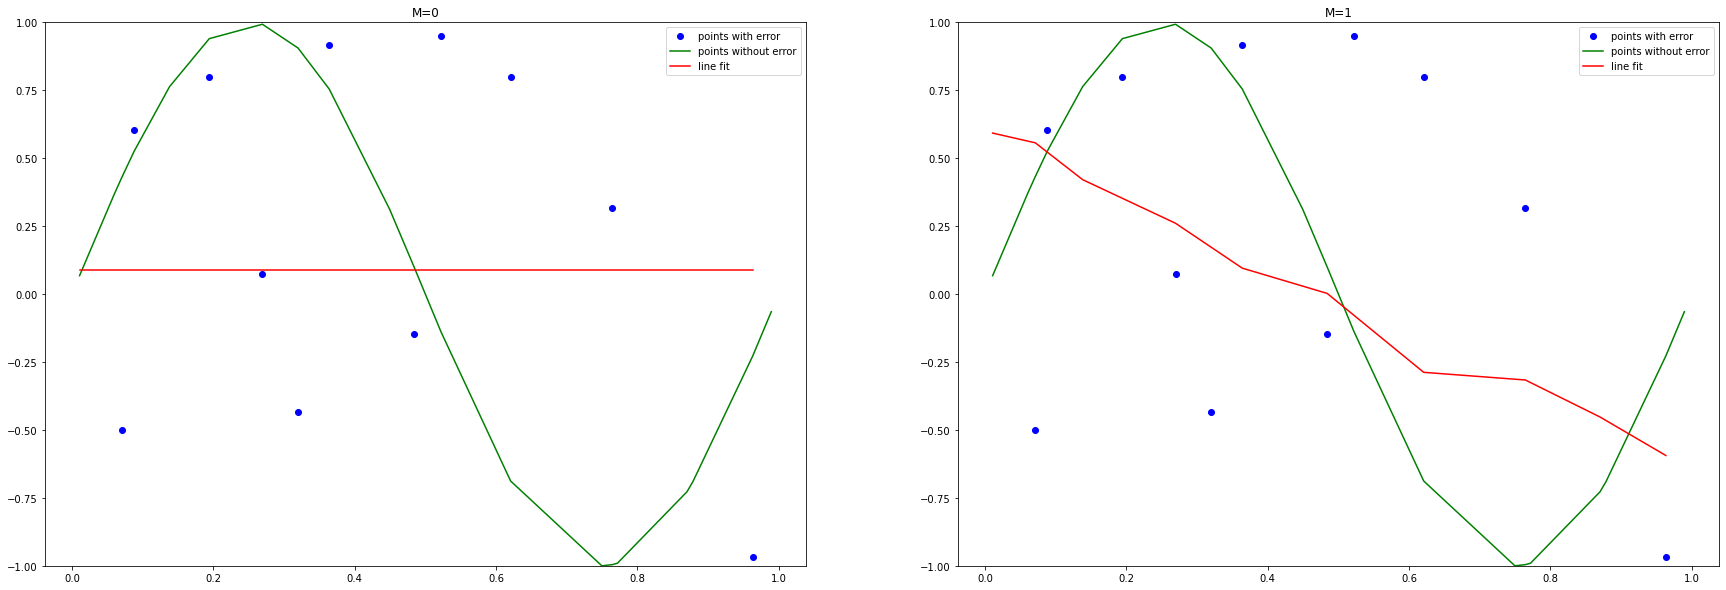

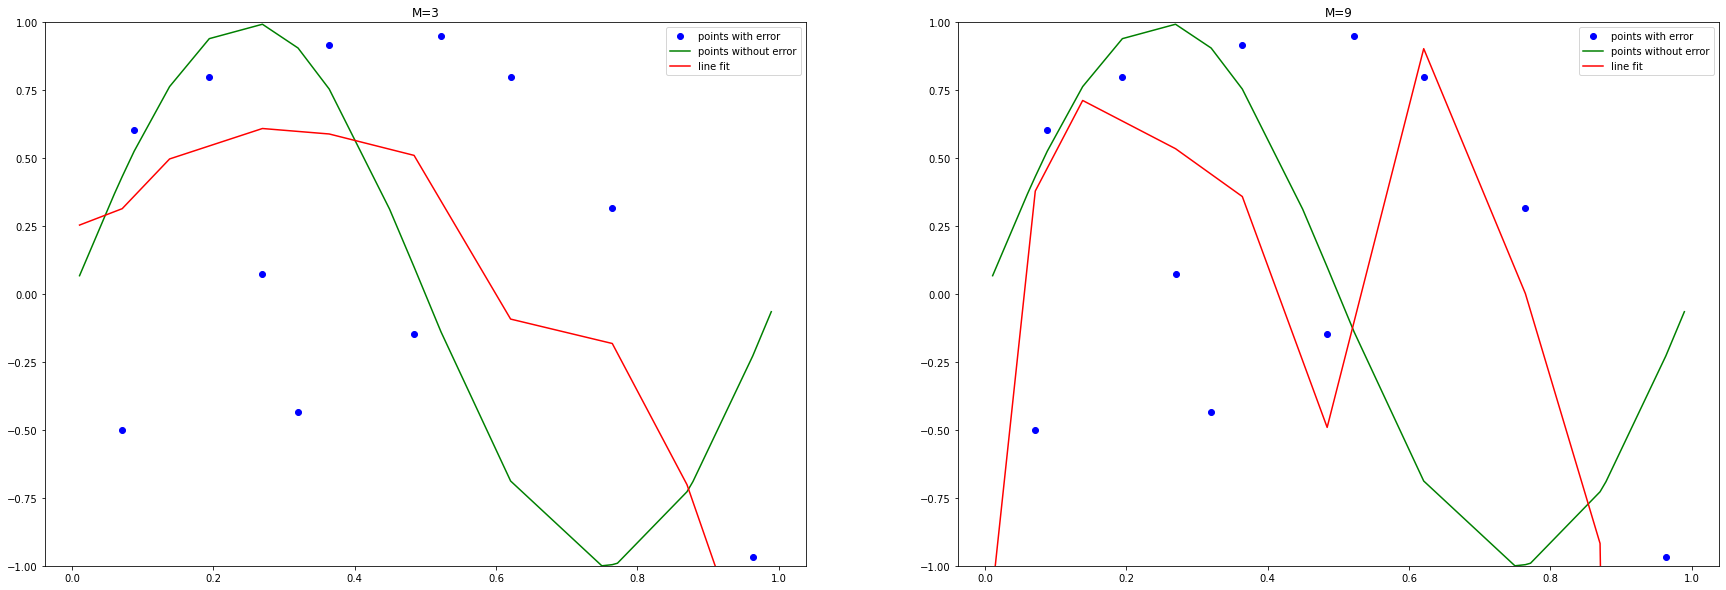

In [229]:
plt.figure(figsize=(30,10))
plt.subplot(1,2,1)
plt.plot(X_value[1:20:1], Y_value_with_noise[1:20:1],'o',color="blue",label="points with error")
plt.plot(X_value, Y_value,linestyle = '-', color="green", label="points without error")
plt.plot(X_value_ret_0,Y_value_ret_0, color="red",label="line fit")
plt.title("M=0")
plt.legend(loc="upper right")
plt.ylim(-1,1)

plt.subplot(1,2,2)
plt.plot(X_value[1:20:1], Y_value_with_noise[1:20:1],'o',color="blue", label="points with error")
plt.plot(X_value, Y_value,linestyle = '-',color="green", label="points without error")
plt.plot(X_value_ret_1,Y_value_ret_1,color="red", label="line fit")
plt.title("M=1")
plt.legend(loc="upper right")
plt.ylim(-1,1)

plt.figure(figsize=(30,10))
plt.subplot(1,2,1)
plt.plot(X_value[1:20:1], Y_value_with_noise[1:20:1],'o',color="blue",label="points with error")
plt.plot(X_value, Y_value,linestyle = '-', color="green", label="points without error")
plt.plot(X_value_ret_3,Y_value_ret_3, color="red",label="line fit")
plt.title("M=3")
plt.legend(loc="upper right")
plt.ylim(-1,1)

plt.subplot(1,2,2)
plt.plot(X_value[1:20:1], Y_value_with_noise[1:20:1],'o',color="blue",label="points with error")
plt.plot(X_value, Y_value,linestyle = '-', color="green", label="points without error")
plt.plot(X_value_ret_9,Y_value_ret_9, color="red",label="line fit")
plt.title("M=9")
plt.legend(loc="upper right")
plt.ylim(-1,1)

plt.show()

## e. Draw train error vs test error

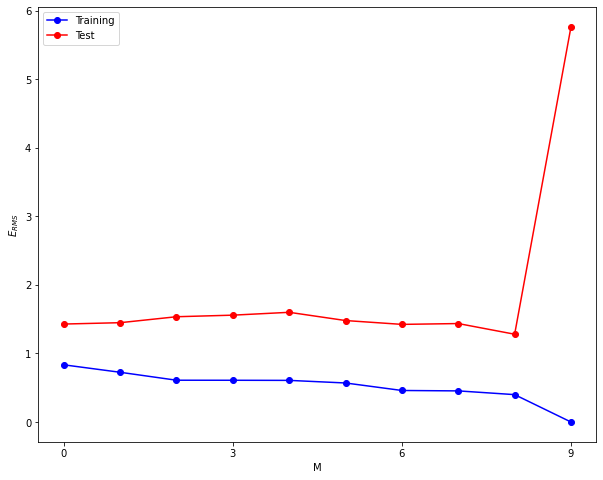

In [230]:
def polyRegression_spcl(train_data, test_data, order_of_equation = 0):
    train_X_value = [X for X,_ in train_data]
    train_Y_value = [Y for _,Y in train_data]
    polynomial = np.poly1d(np.polyfit(train_X_value,train_Y_value,order_of_equation))
    
    pred_Y_test = []
    test_X_value = [X for X,_ in test_data]
    for X in test_X_value:
        pred_Y_test.append(polynomial(X))
    
    pred_Y_train = []
    for X in train_X_value:
        pred_Y_train.append(polynomial(X))
    return (pred_Y_test,pred_Y_train)

pred_Y_test_0,pred_Y_train_0 = polyRegression_spcl(train, test)
pred_Y_test_1,pred_Y_train_1 = polyRegression_spcl(train, test, 1)
pred_Y_test_2,pred_Y_train_2 = polyRegression_spcl(train, test, 2)
pred_Y_test_3,pred_Y_train_3 = polyRegression_spcl(train, test, 3)
pred_Y_test_4,pred_Y_train_4 = polyRegression_spcl(train, test, 4)
pred_Y_test_5,pred_Y_train_5 = polyRegression_spcl(train, test, 5)
pred_Y_test_6,pred_Y_train_6 = polyRegression_spcl(train, test, 6)
pred_Y_test_7,pred_Y_train_7 = polyRegression_spcl(train, test, 7)
pred_Y_test_8,pred_Y_train_8 = polyRegression_spcl(train, test, 8)
pred_Y_test_9,pred_Y_train_9 = polyRegression_spcl(train, test, 9)

train_error = []
test_error = []

def calculate_erms(test_data,train_data,pred_Y_test_ret,pred_Y_train_ret):
    train_X_value = [X for X,_ in train_data]
    train_Y_value = [Y for _,Y in train_data]
    test_X_value = [X for X,_ in test_data]
    test_Y_value = [Y for _,Y in test_data]
    calculator = pd.DataFrame()
    calculator['train_X_value'] = train_X_value
    calculator['train_Y_value'] = train_Y_value
    calculator['test_X_value'] = test_X_value
    calculator['test_Y_value'] = test_Y_value
    calculator['pred_Y_test_ret'] = pred_Y_test_ret
    calculator['pred_Y_train_ret'] = pred_Y_train_ret
    train_error.append(np.sqrt(np.square(calculator['train_Y_value']-calculator['pred_Y_train_ret']).mean(axis=None)))
    test_error.append(np.sqrt(np.square(calculator['test_Y_value']-calculator['pred_Y_test_ret']).mean(axis=None)))
#     print(calculator.head(11))

calculate_erms(test,train,pred_Y_test_0,pred_Y_train_0)
calculate_erms(test,train,pred_Y_test_1,pred_Y_train_1)
calculate_erms(test,train,pred_Y_test_2,pred_Y_train_2)
calculate_erms(test,train,pred_Y_test_3,pred_Y_train_3)
calculate_erms(test,train,pred_Y_test_4,pred_Y_train_4)
calculate_erms(test,train,pred_Y_test_5,pred_Y_train_5)
calculate_erms(test,train,pred_Y_test_6,pred_Y_train_6)
calculate_erms(test,train,pred_Y_test_7,pred_Y_train_7)
calculate_erms(test,train,pred_Y_test_8,pred_Y_train_8)
calculate_erms(test,train,pred_Y_test_9,pred_Y_train_9)


plt.figure(figsize=(10,8))
plt.plot(list(range(0,10)),train_error, 'b-o',label="Training")
plt.plot(list(range(0,10)),test_error, 'r-o',label="Test")
plt.legend(loc="upper left")
plt.xticks(np.arange(0, 10, step=3))
plt.xlabel("M")
plt.ylabel(r"$E_{RMS}$")
# plt.ylim(0,8)

plt.show()

## f. Now generate 100 more data and fit 9th order model and draw fit

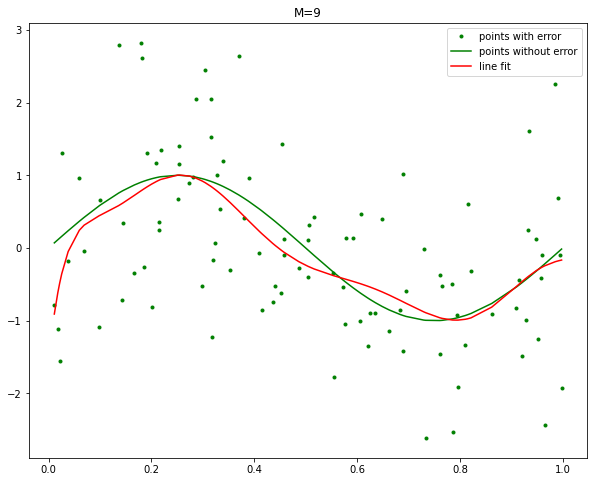

In [231]:
# np.random.seed(seed = 5)
mu, sigma = 0, 1
normal_dist = np.random.normal(mu, sigma, 100)

# generating 20 uniform distribution values
X_value = np.sort(np.random.uniform(0,1,100))

# generating values of Y by the given formula
Y_value = np.sin(2 * np.pi * X_value)
Y_value_with_noise = Y_value + normal_dist

# data pairs
data_pairs_100 = []
for X,Y in zip(X_value,Y_value_with_noise): 
    data_pairs_100.append((X,Y,))

train_X_value = [X for X,_ in data_pairs_100]
train_Y_value = [Y for _,Y in data_pairs_100]

X_value_ret_9 = train_X_value
Y_value_ret_9 = []
polynomial = np.poly1d(np.polyfit(train_X_value,train_Y_value,9))

for X in X_value_ret_9:
    Y_value_ret_9.append(polynomial(X))

plt.figure(figsize=(10,8))
plt.plot(X_value, Y_value_with_noise,'.',color="green",label="points with error")
plt.plot(X_value, Y_value,color="green", label="points without error")
plt.plot(X_value_ret_9,Y_value_ret_9,color="red",label="line fit")
plt.title("M=9")
plt.legend(loc="upper right")
plt.show()

## h. Draw chart for lambda is 1, 1/10, 1/100, 1/1000, 1/10000, 1/100000

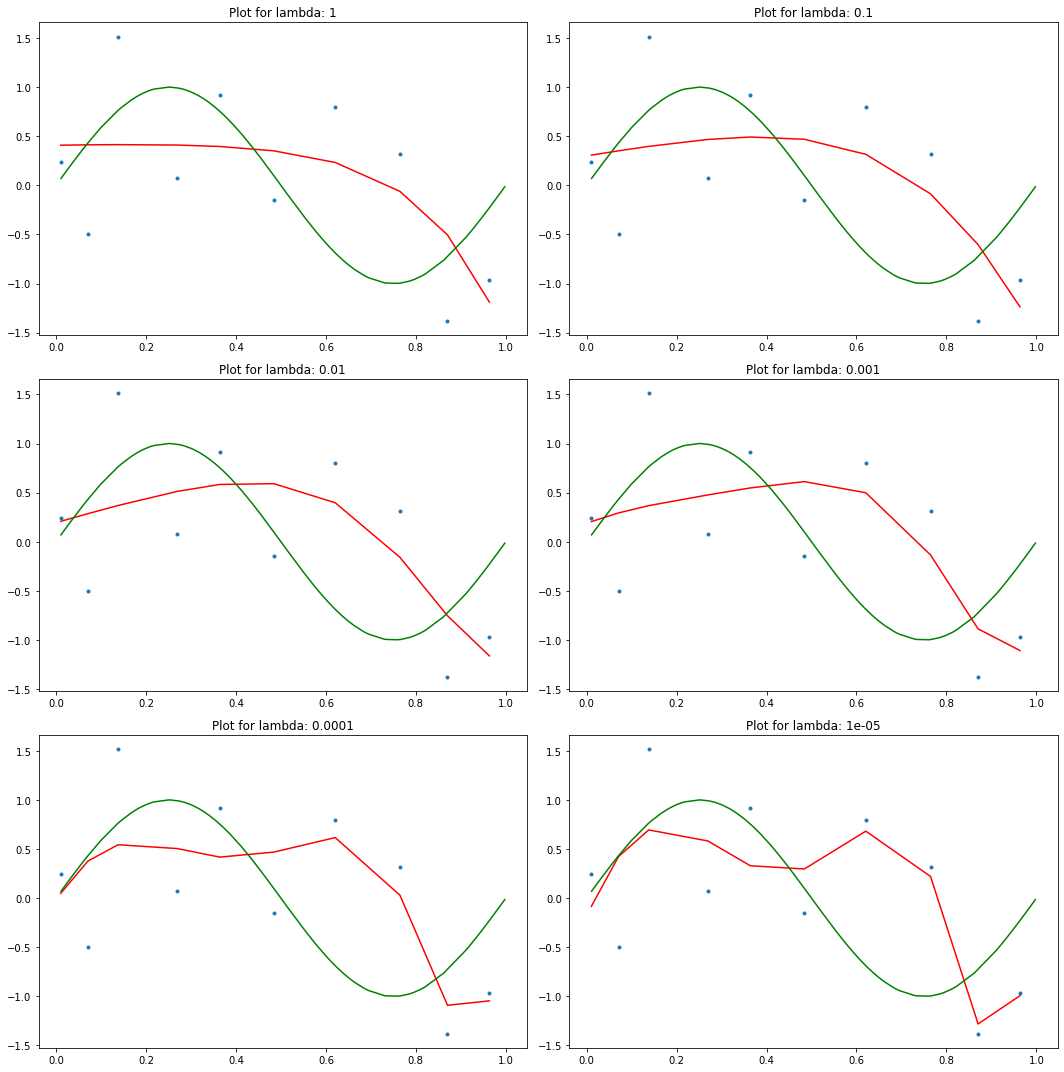

In [232]:
plt.figure(figsize=(15,15))

train_X_value = [X for X,_ in train]
train_Y_value = [Y for _,Y in train]
data = pd.DataFrame(np.column_stack([train_X_value,train_Y_value]),columns=['x','y'])

for i in range(2,10):  #power of 1 is already there
    colname = 'x_%d'%i      #new var will be x_power
    data[colname] = data['x']**i

def ridge_regression(data, predictors, alpha, models_to_plot={}):
    #Fit the model
    ridgereg = Ridge(alpha=alpha/2,normalize=True)
    ridgereg.fit(data[predictors],data['y'])
    y_pred = ridgereg.predict(data[predictors])
    
    #Check if a plot is to be made for the entered alpha
    if alpha in models_to_plot:
        plt.subplot(models_to_plot[alpha])
        plt.tight_layout()
        plt.plot(data['x'],y_pred,color="red")
        plt.plot(data['x'],data['y'],'.')
        plt.plot(X_value, Y_value,color="green")
        plt.title('Plot for lambda: %.3g'%alpha)
    
    #Return the result in pre-defined format
    rss = sum((y_pred-data['y'])**2)
    ret = [rss]
    ret.extend([ridgereg.intercept_])
    ret.extend(ridgereg.coef_)
    return ret

#Initialize predictors to be set of 9 powers of x
predictors=['x']
predictors.extend(['x_%d'%i for i in range(2,10)])

#Set the different values of alpha to be tested
alpha_ridge = [1, 1/10, 1/100, 1/1000, 1/10000,1/100000]

#Initialize the dataframe for storing coefficients.
col = ['rss','intercept'] + ['coef_x_%d'%i for i in range(1,10)]
ind = ['lambda_%.2g'%alpha_ridge[i] for i in range(0,6)]
coef_matrix_ridge = pd.DataFrame(index=ind, columns=col)

models_to_plot = {1:321, 0.1:322, 0.01:323, 0.001:324, 0.0001:325, 0.00001:326}
for i in range(6):
    coef_matrix_ridge.iloc[i,] = ridge_regression(data, predictors, alpha_ridge[i], models_to_plot)

## i. Now draw test and train error according to lamda

Text(0, 0.5, '$E_{RMS}$')

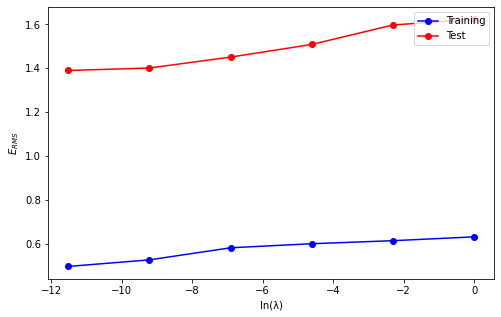

In [233]:
# defining degree of polynomial
degree_of_poly = 9 # (minimum value of 1 allowed)

# getting train data in proper format
train_X_value = [X for X,_ in train]
train_Y_value = [Y for _,Y in train]
train_data = pd.DataFrame(np.column_stack([train_X_value,train_Y_value]),columns=['x','y'])

for i in range(2,degree_of_poly + 1):  #power of 1 is already there
    colname = 'x_%d'%i      #new var will be x_power
    train_data[colname] = train_data['x']**i

# getting test data in proper format
test_X_value = [X for X,_ in test]
test_Y_value = [Y for _,Y in test]
test_data = pd.DataFrame(np.column_stack([test_X_value,test_Y_value]),columns=['x','y'])

for i in range(2,degree_of_poly + 1):  #power of 1 is already there
    colname = 'x_%d'%i      #new var will be x_power
    test_data[colname] = test_data['x']**i

train_error = []
test_error = []
def ridge_regression(data_train, data_test, predictors, alpha):
    #Fit the model
    ridgereg = Ridge(alpha=alpha/2,normalize=True)
    ridgereg.fit(data_train[predictors],data_train['y'])
    y_pred_train = ridgereg.predict(data_train[predictors])
    calculator = pd.DataFrame()
    calculator['pred_Y_train_ret'] = y_pred_train
    train_error.append(np.sqrt(np.square(data_train['y']-calculator['pred_Y_train_ret']).mean(axis=None)))
    
    y_pred_test = ridgereg.predict(data_test[predictors])
    calculator['pred_Y_test_ret'] = y_pred_test
    test_error.append(np.sqrt(np.square(data_test['y']-calculator['pred_Y_test_ret']).mean(axis=None)))
    
#     Return the result in pre-defined format
#     rss = sum((y_pred_train-data['y'])**2)
#     ret = [rss]
#     ret.extend([ridgereg.intercept_])
#     ret.extend(ridgereg.coef_)
#     return ret

#Initialize predictors to be set of (degree_of_poly + 1) powers of x
predictors=['x']
predictors.extend(['x_%d'%i for i in range(2,degree_of_poly + 1)])

#Set the different values of alpha to be tested
alpha_ridge = [1, 1/10, 1/100, 1/1000, 1/10000,1/100000]

#Initialize the dataframe for storing coefficients.
col = ['rss','intercept'] + ['coef_x_%d'%i for i in range(1,degree_of_poly + 1)]
ind = ['lambda_%.2g'%alpha_ridge[i] for i in range(0,6)]
coef_matrix_ridge = pd.DataFrame(index=ind, columns=col)

for i in range(6):
    coef_matrix_ridge.iloc[i,] = ridge_regression(train_data, test_data, predictors, alpha_ridge[i])

plt.figure(figsize=(8,5))
plt.plot(np.log(alpha_ridge),train_error, 'b-o',label="Training")
plt.plot(np.log(alpha_ridge),test_error, 'r-o',label="Test")
plt.legend(loc="upper right")
plt.xlabel("ln(λ)")
plt.ylabel(r"$E_{RMS}$")

## j. Based on the best test performance, what is your model?
### Ans:
### - less number of data samples:
For the given number of data set points, if we consider the plotting graph and the test error v/s training error graph, the model obtained using degree 3 provides a good fit and and a low error between the test and train data samples.

### - large number of data samples:
For large number of data sample we can observe that a low degree polynomial won't be a good fit, hence we need a higher 
degree polynomial. But, higher degreee polynomials tend to overfit the training data, to resolve this issue we need to 
regularize(use something like sum of weights) the cost function.
So for a large data set polynomial of order 9 with L2 regularization and alpha=1/10000 would be a good fit.